In [3]:
import tensorflow as tf
import numpy as np
#import mnist_handler
import matplotlib.pyplot as plt


"""load Olivetti Face"""
dataset_x = np.load('olivetti_faces.npy')
dataset_y = np.load('olivetti_faces_target.npy')
print(dataset_x.shape)
INPUT_DIMENSION = 64*64
x_train = []
x_test = []
y_train = []
y_test = []
x_train_init = []
y_train_init = []
x_train_seq = []
y_train_seq = []
p = np.random.permutation(10)
for i in range(40):
    tmp_x = dataset_x[i*10:i*10+10]
    tmp_y = dataset_y[i*10:i*10+10]
    tmp_x = tmp_x[p]
    tmp_y = tmp_y[p]
    for j in range(2):
        x_train_init.append(tmp_x[j])
        y_train_init.append(tmp_y[j])
        x_train.append(tmp_x[j])
        y_train.append(tmp_y[j])
    for j in range(2,8):
        x_train_seq.append(tmp_x[j])
        y_train_seq.append(tmp_y[j])
        x_train.append(tmp_x[j])
        y_train.append(tmp_y[j])
    for j in range(8,10):
        x_test.append(tmp_x[j])
        y_test.append(tmp_y[j])
train_x = x_train        
x_train = np.array(x_train)
x_train = np.reshape(x_train, [-1, INPUT_DIMENSION])
#print(x_train)
test_x = x_test
x_test = np.array(x_test)
x_test = np.reshape(x_test, [-1, INPUT_DIMENSION])
y_train = np.array(y_train)
p = np.random.permutation(len(x_train))
x_train = x_train[p]
y_train = y_train[p]
y_test = np.array(y_test)
#print("x_t")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

INPUT_DIMENSION = 64*64
NUM_CLASSES = 40


border = 80
x_train_init = np.array(x_train_init)
x_train_init = np.reshape(x_train_init, [-1, INPUT_DIMENSION])
y_train_init = np.array(y_train_init)
x_train_seq = np.array(x_train_seq)
x_train_seq = np.reshape(x_train_seq, [-1, INPUT_DIMENSION])
y_train_seq = np.array(y_train_seq)
x_train_seq.shape

(400, 64, 64)
(320, 4096)
(80, 4096)
(320,)
(80,)


(240, 4096)

In [ ]:
n_input_nodes = 4096
n_hidden_nodes = 90  # used to be 6
n_output_nodes = 4096

import time
accuracy_sum = 0
time_sum = 0
for PPAP in range(10):
	tf.reset_default_graph()

	"""BP autoencoder"""
	X = tf.placeholder(tf.float32, [None, n_input_nodes])
	Y = tf.placeholder(tf.float32, [None, n_output_nodes])

	encoding_layer = tf.layers.dense(inputs=X,units=n_hidden_nodes,activation=tf.math.sin)
	Y_hat = tf.layers.dense(inputs=encoding_layer,units=n_output_nodes,activation=None)

	loss = tf.losses.mean_squared_error(labels=Y,predictions=Y_hat)

	optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

	sess = tf.Session()
	sess.run(tf.global_variables_initializer())

	t1 = time.time()
	BATCH_SIZE = 128
	for epoch in range(1000):
		i = 0
		while i < len(x_train):
			try:
				batch_x = x_train[i:i+BATCH_SIZE]
				batch_y = x_train[i:i+BATCH_SIZE]
			except:
				batch_x = x_train[i:]
				batch_y = x_train[i:]
			i+=BATCH_SIZE
			sess.run(optimizer, feed_dict={X:batch_x, Y:batch_y})
	t2 = time.time()
	time_sum+=(t2-t1)

	"""classification"""
	x_train_encoded = sess.run(encoding_layer, feed_dict={X: x_train})
	x_test_encoded = sess.run(encoding_layer, feed_dict={X: x_test})



In [24]:
from auto_elm import AUTO_ELM   # Our proposed algorithm
n_input_nodes = 4096
n_hidden_nodes = 100 # used to be 256
n_output_nodes = 4096

x_train_decoded = sess.run(Y_hat, feed_dict={X: x_train})

In [ ]:
n = 10
plt.figure(figsize=(10,4))
for idx in range(n):
    ax = plt.subplot(2,n,idx+1)
    img = x_train_decoded[idx]
    im = x_train[idx]
    ad =  im.reshape((64,64))
    plt.imshow(ad)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    reconstructed_img = img.reshape((64,64))
    #print("The reconstructed image")
    ax = plt.subplot(2,n,idx+1+n)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#x_train_decoded = sess.run(Y_hat, feed_dict={X: x_train_encoded})
img = x_train_decoded[0]
g = img.reshape(64,64)
plt.subplot(321)
plt.imshow(g)

In [25]:
import time
accuracy_sum = 0
time_sum = 0
for PPAP in range(10):
	tf.reset_default_graph()
	# ===========================================
	# Instantiate os-elm
	# ===========================================
	auto_elm = AUTO_ELM(
		# the number of input nodes.
		n_input_nodes=n_input_nodes,
		# the number of hidden nodes.
		n_hidden_nodes=n_hidden_nodes,
		# the number of output nodes.
		n_output_nodes=n_output_nodes,
		# loss function.
		# the default value is 'mean_squared_error'.
		# for the other functions, we support
		# 'mean_absolute_error', 'categorical_crossentropy', and 'binary_crossentropy'.
		c_value = 2.0**(2),
		loss='mean_squared_error',
		# activation function applied to the hidden nodes.
		# the default value is 'sigmoid'.
		# for the other functions, we support 'linear' and 'tanh'.
		# NOTE: OS-ELM can apply an activation function only to the hidden nodes.
		activation='sin',
	)
	# ===========================================
	# Training
	# ===========================================
	# the initial training phase
	t1 = time.time()
	auto_elm.init_train(x_train_init, x_train_init)
	t2 = time.time()
	time_sum+=(t2-t1)

	# the sequential training phase
	batch_size = 80

	t1 = time.time()
	for epoch in range(100):
		for i in range(0, len(x_train_seq), batch_size):
			x_batch = x_train_seq[i:i+batch_size]
			if len(x_batch) != batch_size:
				break
			auto_elm.seq_train(x_batch, x_batch)
	t2 = time.time()
	time_sum+=(t2-t1)
time_sum = time_sum/10

In [26]:
x_train_encoded = auto_elm.encoding(x_train)
x_test_encoded = auto_elm.encoding(x_test)
x_train_encoded.shape

(320, 100)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(x_train_encoded)
target_ids = range(10)

from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
colors = 'r', 'g', 'b'
for i, c, label in zip(target_ids, colors, ['Negative','Neutral','Positive']):
    plt.scatter(X_2d[YYYY == i, 0], X_2d[YYYY == i, 1], c=c, label=label,marker = '.')
plt.legend()
plt.show()

(4096, 100)


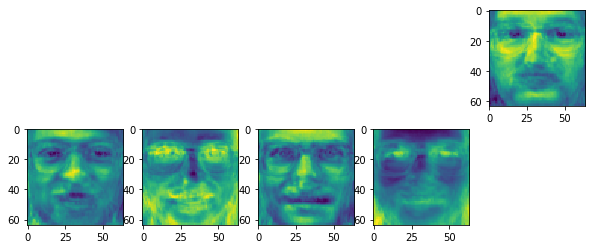

In [27]:
tmp = auto_elm.retrieve_alpha()
print(tmp.shape)
plt.figure(figsize=(10,4))
for i in range(1,2):
    for j in range(5):
        plt.subplot(2,5,i*5+j)
        plt.imshow(np.reshape(tmp[:,i*5+j], [64,64]))
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(10,4))
for idx in range(n):
    ax = plt.subplot(2,n,idx+1)
    img = x_train_decoded[idx]
    im = x_train[idx]
    ad =  im.reshape((64,64))
    plt.imshow(ad)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    reconstructed_img = img.reshape((64,64))
    #print("The reconstructed image")
    ax = plt.subplot(2,n,idx+1+n)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
border = 40
x_train_init = x_train_encoded[:border]
y_train_init = y_train[:border]
x_train_seq = x_train_encoded[border:]
y_train_seq = y_train[border:]
INPUT_DIMENSION = 90
NUM_CLASSES = 40

In [8]:
x_train_decoded = auto_elm.predict(x_train)

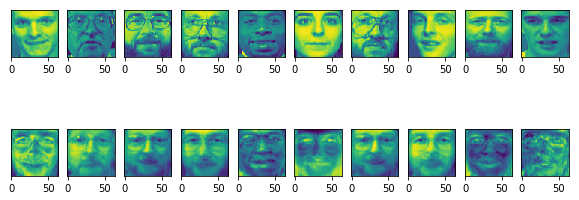

In [9]:
n = 10
plt.figure(figsize=(10,4))
for idx in range(n):
    ax = plt.subplot(2,n,idx+1)
    img = x_train_decoded[idx]
    im = x_train[idx]
    ad =  im.reshape((64,64))
    plt.imshow(ad)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    reconstructed_img = img.reshape((64,64))
    #print("The reconstructed image")
    ax = plt.subplot(2,n,idx+1+n)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
#matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

batch_size = 128
epochs = 50
inChannel = 1
x, y = 64, 64
input_img = Input(shape = (x, y, inChannel))



train_data = train_x.reshape(-1, 64,64, 1)
test_data = test_x.reshape(-1, 64,64, 1)
train_x = np.array(train_data)
test_x =  np.array(test_data)

from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_x,
                                                             train_x, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [ ]:

C.shape

In [ ]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error',optimizer = RMSprop(),  metrics=['acc'])
autoencoder.summary()

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))
pred = autoencoder.predict(test_x)
  #metrics=['accuracy',...]



In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0])
    #curr_lbl = test_labels[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], )  
plt.show()

In [ ]:
"""Utility functions"""
def mul(A, B):
    return tf.matmul(A, B)

def inv(A):
    return tf.matrix_inverse(A)

def t(A):
    return tf.transpose(A)

def sin(A):
    return tf.math.sin(A)

def asin(A):
    return tf.math.asin(A)

def sqrt(A):
    return tf.sqrt(A)

def sqr(A):
    return tf.math.pow(A, 2)

def pseudo_inv(A, I, C):
    C_I = I/C
    return mul(t(A), inv(C_I + mul(A, t(A))))

def h(A):
    '''activation function'''
    return sin(A)

def h_(A):
    '''inverse activation function'''
    return asin(A)

def u(A):
    '''normalize the input to (0,1]'''
    return tf.math.sigmoid(A) # sigmoid
    
def u_(A):
    '''the inverse of u'''
    ONE = tf.constant(1.0)
    return -(tf.math.log(ONE/A - ONE)) # the inverse of sigmoid
    
def subnet_output(alpha, beta, A):
    return t(mul(beta, h(mul(t(alpha), t(A))))) 

In [ ]:
tf.reset_default_graph() # clear all the tensors
sess = tf.Session()


"""Placeholders"""
#X = tf.placeholder(tf.float32, [None, 64, 64])

X_ = tf.placeholder(tf.float32, [None, INPUT_DIMENSION])
Y = tf.placeholder(tf.int64, [None]) # labels
Y_ = tf.one_hot(indices=Y, depth=NUM_CLASSES) # one_hot labels: [N,M]

"""Some constants"""
D = INPUT_DIMENSION
M = NUM_CLASSES # Number of outputs
C = tf.constant(2.0**(4))

"""Weights"""
alpha_1 = tf.get_variable('alpha_1',shape=[D, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False) # 1st subnetwork
alpha_2 = tf.get_variable('alpha_2',shape=[D, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False) # 2st subnetwork
alpha_3 = tf.get_variable('alpha_3',shape=[D, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False)
beta_1 = tf.get_variable('beta_1',shape=[M, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False)
beta_2 = tf.get_variable('beta_2',shape=[M, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False)
beta_3 = tf.get_variable('beta_3',shape=[M, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False)

In [ ]:
k = tf.get_variable('k',shape=[D, D],initializer=tf.random_uniform_initializer(-1,1),trainable=False)
m = tf.get_variable('m',shape=[M, M],initializer=tf.random_uniform_initializer(-1,1),trainable=False)

# Initial Training

In [ ]:
"""Initial Training Graph"""
# D: input dimension
# N: number of input samples
# M: number of classes (number of outputs)
'''some pre-computations'''
X_init = t(X_) # [D,N]
Y_init = t(Y_) # [M,N]
N_init = D # number of dimensions
I_DxD = tf.eye(N_init, dtype=tf.float32) # [D,D]
I_MxM = tf.eye(M, dtype=tf.float32) # [M,M]
C_I = I_DxD/C
H_I = I_MxM/C

add = C_I + mul(X_init, t(X_init))
k = tf.assign(k,add)
X_inv_init = pseudo_inv(X_init, I_DxD, C) # [N,D]

'''1st subnet'''
alpha_1_init_calculated = t(mul(h_(Y_init), X_inv_init)) # ([M,N]x[N,D])T=[D,M]
alpha_1_init = tf.assign(alpha_1, alpha_1_init_calculated) # [D,M]
H_1_init = h(mul(t(alpha_1_init), X_init)) # [M,N]
H_add = H_I + mul(H_1_init,t(H_1_init))
m = tf.assign(m,H_add)
H_pseudo_init = pseudo_inv(H_1_init,I_MxM,C) #[N,M]

#beta_1_init_calculated = mul(Y_init, t(H_1_init))/sqr(tf.norm(H_1_init)) # [M,M]
beta_1_init_calculated = mul(Y_init,H_pseudo_init)

beta_1_init = tf.assign(beta_1, beta_1_init_calculated) # [M,M]
H_beta_1_init = mul(beta_1_init, t(mul(t(X_init), alpha_1_init))) # [M,N]
E_1_init = Y_init - H_beta_1_init # [M,N]

'''2nd subnet'''
#alpha_2_init_calculated = t(mul(h_(E_1_init), X_inv_init)) # [D,M]    
alpha_2_init_calculated = t(mul(asin(Y_init), X_inv_init)) # [D,M]

alpha_2_init = tf.assign(alpha_2, alpha_2_init_calculated) # [D,M]
H_2_init = h(mul(t(alpha_2_init), X_init)) # [M,N]
H_2_inv_init = pseudo_inv(H_2_init, I_MxM, C) # [M,N]
H_add = H_I + mul(H_2_init,t(H_2_init))
#m = tf.assign(m,H_add)
H_pseudo_init = pseudo_inv(H_2_init,I_MxM,C) #[N,M]

#beta_2_init_calculated = mul(E_1_init, t(H_2_init))/sqr(tf.norm(H_2_init)) # [M,M]
beta_2_init_calculated = mul(E_1_init, H_pseudo_init)

beta_2_init = tf.assign(beta_2, beta_2_init_calculated) # [M,M]
H_beta_2_init = mul(beta_2_init, t(mul(t(X_init), alpha_2_init))) # [M,N]
E_2_init = Y_init - (H_beta_1_init+H_beta_2_init) # [M,N]

'''3rd subnetwork'''
alpha_3_init_calculated = t(mul(h_(E_2_init), X_inv_init)) # [D,M]    
alpha_3_init_calculated = t(mul(asin(Y_init), X_inv_init)) # [D,M]

alpha_3_init = tf.assign(alpha_3, alpha_3_init_calculated) # [D,M]
H_3_init = h(mul(t(alpha_3_init), X_init)) # [M,N]
H_3_inv_init = pseudo_inv(H_3_init, I_MxM, C) # [M,N]

#beta_3_init_calculated = mul(E_2_init, t(H_3_init))/sqr(tf.norm(H_3_init)) # [M,M]
beta_3_init_calculated = mul(E_2_init, H_3_inv_init)

beta_3_init = tf.assign(beta_3, beta_3_init_calculated) # [M,M]
H_beta_3_init = mul(beta_3_init, t(mul(t(X_init), alpha_3_init))) # [M,N]
E_3_init = Y_init - (H_beta_3_init+H_beta_2_init+ H_beta_1_init) # [M,N]

#init_train_graph = H_beta_1_init
init_train_graph = E_3_init




In [ ]:
"""Evaluate initial-training graph"""
logits_init =  subnet_output(alpha_1, beta_1, X_)
#logits_init = subnet_output(alpha_1, beta_1, X_) + subnet_output(alpha_2, beta_2, X_)
loss_init = tf.losses.mean_squared_error(labels=Y_, predictions=logits_init)
accuracy_init = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y_, axis=1), tf.argmax(logits_init, axis=1)), dtype=tf.float32))

In [ ]:
"""Initialize variables"""
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
"""Initial training"""
sess.run(init_train_graph, feed_dict={X_: x_train_init, Y: y_train_init})
print("Initial training done")

"""Initial training evaluation"""
tr_loss, tr_acc = sess.run([loss_init, accuracy_init], feed_dict={X_: x_train_encoded, Y: y_train})
ts_loss, ts_acc = sess.run([loss_init, accuracy_init], feed_dict={X_: x_test_encoded, Y: y_test})
print("Initial train training loss: ", tr_loss)
print("Initial train training accuracy: ", tr_acc)
print("Initial train testing loss: ", ts_loss)
print("Initial train testing accuracy: ", ts_acc)

In [ ]:
"""Evaluate initial-training graph"""
#logits_init =  subnet_output(alpha_1, beta_1, X_)
logits_init = subnet_output(alpha_1, beta_1, X_) + subnet_output(alpha_2, beta_2, X_) + subnet_output(alpha_3, beta_3, X_)
loss_init = tf.losses.mean_squared_error(labels=Y_, predictions=logits_init)
accuracy_init = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y_, axis=1), tf.argmax(logits_init, axis=1)), dtype=tf.float32))

In [ ]:
"""Initial training"""
sess.run(init_train_graph, feed_dict={X_: x_train_init, Y: y_train_init})
print("Initial training done")

"""Initial training evaluation"""
tr_loss, tr_acc = sess.run([loss_init, accuracy_init], feed_dict={X_: x_train_encoded, Y: y_train})
ts_loss, ts_acc = sess.run([loss_init, accuracy_init], feed_dict={X_: x_test_encoded, Y: y_test})
print("Initial train training loss: ", tr_loss)
print("Initial train training accuracy: ", tr_acc)
print("Initial train testing loss: ", ts_loss)
print("Initial train testing accuracy: ", ts_acc)

# Sequential Training

In [ ]:
"""Sequential Training Graph"""
# D: input dimension
# N: number of input samples
# M: number of classes (number of outputs)
X_seq = t(X_) # [D,N]
Y_seq = t(Y_) # [M,N]
pseudo = mul(X_seq, X_) #DXD
k = tf.assign(k, tf.add(k,pseudo)) #DXD
k_inv = inv(k)

new = tf.matmul(tf.matmul(k_inv, X_seq),h_(Y_) - tf.matmul(X_, alpha_1))
alpha1_seq = tf.assign(alpha_1,tf.add(alpha_1,new)) #DXM
H_1_seq = h(mul(t(alpha1_seq), X_seq)) # [M,N]
m_su = mul(H_1_seq,t(H_1_seq))
m = tf.assign(m,tf.add(m,m_su))
m_inv = inv(m)
#update = tf.matmul(tf.matmul(m_inv,H_1_seq),h_(Y_seq)- tf.matmul())
H_pseudo_init = pseudo_inv(H_1_seq,I_MxM,C) #[N,M]
#UPDATE = tf.matmul(tf.matmul(K_inverse, HT), inverse_acti_y - tf.matmul(H, self.__outputWeight))
beta_1_seq_calculated = mul(Y_seq, H_pseudo_init) # [M,M]
beta_1_seq = tf.assign(beta_1, beta_1_seq_calculated) # [M,M]
H_beta_1_seq = mul(beta_1_seq, t(mul(X_, alpha1_seq))) # [M,N]
E_1_seq = Y_seq - H_beta_1_seq # [M,N]

'''2nd subnetwork'''

new = tf.matmul(tf.matmul(k_inv, X_seq),h_(Y_) - tf.matmul(X_, alpha_2))
alpha2_seq = tf.assign(alpha_2,tf.add(alpha_2,new)) #DXM
H_2_seq = h(mul(t(alpha2_seq), X_seq)) # [M,N]
H_pseudo_init = pseudo_inv(H_2_seq,I_MxM,C) #[N,M]
beta_2_seq_calculated = mul(E_1_seq, H_pseudo_init) # [M,M]
beta_2_seq = tf.assign(beta_2, beta_2_seq_calculated) # [M,M]
H_beta_2_seq = mul(beta_2_seq, t(mul(t(X_seq), alpha2_seq))) # [M,N]
E_2_seq = Y_seq - (H_beta_2_seq+ H_beta_1_seq) # [M,N]

'''3rd subnetwork'''
new = tf.matmul(tf.matmul(k_inv, X_seq),h_(Y_) - tf.matmul(X_, alpha_3))
alpha3_seq = tf.assign(alpha_3,tf.add(alpha_3,new)) #DXM
H_3_seq = h(mul(t(alpha3_seq), X_seq)) # [M,N]
H_pseudo_init = pseudo_inv(H_3_seq,I_MxM,C) #[N,M]
beta_3_seq_calculated = mul(E_2_seq, H_pseudo_init) # [M,M]
beta_3_seq = tf.assign(beta_3, beta_3_seq_calculated) # [M,M]
H_beta_3_seq = mul(beta_3_seq, t(mul(t(X_seq), alpha3_seq))) # [M,N]
E_3_seq = Y_seq - (H_beta_3_seq +H_beta_2_seq + H_beta_1_seq )# [M,N]
seq_train_graph = E_3_seq






In [ ]:
"""Evaluate initial-training graph"""
logits_seq =  subnet_output(alpha_1, beta_1, X_) + subnet_output(alpha_2, beta_2, X_) + subnet_output(alpha_3, beta_3, X_)
#logits_init = subnet_output(alpha_1, beta_1, X_) + subnet_output(alpha_2, beta_2, X_)
loss_seq = tf.losses.mean_squared_error(labels=Y_, predictions=logits_seq)
accuracy_seq = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y_, axis=1), tf.argmax(logits_seq, axis=1)), dtype=tf.float32))

In [ ]:
"""Initialize variables"""
#init = tf.global_variables_initializer()
#sess.run(init)

"""Sequential training"""
batch_size = 80

epoch_train_accuracy = []
epoch_test_accuracy = []
for epoch in range(20):
    #pbar = tqdm.tqdm(total=len(x_train), desc='sequential training phase')\
    t1 = time.time()
    for i in range(0, len(x_train_seq), batch_size):
        x_batch = x_train_seq[i:i+batch_size]
        y_batch = y_train_seq[i:i+batch_size]
        if len(x_batch) != batch_size:
            break
        sess.run(E_1_seq, feed_dict={X_: x_batch, Y: y_batch})
        #pbar.update(n=len(x_batch))
    t2 = time.time()
    time_sum+=(t2-t1)
    '''epoch evaluation'''
    [train_loss, train_accuracy] = sess.run([loss_seq, accuracy_seq], feed_dict={X_: x_train_encoded, Y: y_train})
    [test_loss, test_accuracy] = sess.run([loss_seq, accuracy_seq], feed_dict={X_: x_test_encoded, Y: y_test})
    print('train_loss: %f, train_accuracy: %f' % (train_loss, train_accuracy))
    print('test_loss: %f, test_accuracy: %f' % (test_loss, test_accuracy))
    epoch_train_accuracy.append(train_accuracy)
    epoch_test_accuracy.append(test_accuracy)
#sess.run(init_train_graph, feed_dict={X: x_train_init, Y: y_train_init})
print("Sequential training done")
print(time_sum)

"""Sequential training evaluation"""

In [ ]:
#logits_ = subnet_output(alpha_1, beta_1, X_) + subnet_output(alpha_2, beta_2, X_)
logits_ = subnet_output(alpha_1, beta_1, X_) 
logits__ = sess.run(logits_, feed_dict={X_: [x_test_encoded[10]]})
print(logits__)
print(np.argmax(logits__))
print(y_test[10])
#plt.imshow(x_test[10])

In [ ]:
def visualize_alpha(alpha, size):
    tmp = sess.run(alpha)
    plt.figure(figsize=(10,4))
    for i in range(2):
        for j in range(5):
            plt.subplot(2,5,i*5+j+1)
            plt.imshow(np.reshape(tmp[:,i*5+j], [size,size]))

def visualize_beta(beta):
    tmp = sess.run(beta)
    plt.figure(figsize=(4,4))
    plt.imshow(tmp)
    
            
"""visualize subnet nodes"""            
visualize_alpha(alpha_1, 64)
visualize_beta(beta_1)
visualize_alpha(alpha_2, 64)
visualize_beta(beta_2)

In [ ]:
import matplotlib.path as mpath
x = [25,51,75,102,125]
y1 = [4.21,4.24,4.451,4.621,4.75]
y2 = [6.19,5.62,5.84,6.76,7.45]

plt.plot(x,y1,'--r')
plt.plot(x,y2,'--b')
plt.ylabel('Training Time')
plt.xlabel('number of features')
plt.legend(['proposed', 'autoencoder +ELM'], loc='lower right')

In [ ]:
sess.run(tf.math.sin(tf.constant([0.9])))